#  **Overview of SMS Classifier**

This code is a comprehensive script for building and evaluating a spam detection model using a dataset of SMS messages. The key steps are as follows:

1. **Importing Libraries**: Essential libraries for data manipulation (pandas), machine learning (scikit-learn), and accessing Google Drive are imported.

2. **Mounting Google Drive**: The Google Drive is mounted to access the dataset stored in it.

3. **Loading the Dataset**: The SMS spam dataset is loaded from a CSV file located in Google Drive.

4. **Initial Data Inspection**: The first and last few rows of the dataset are displayed to understand its structure and content.

5. **Checking for Null Values**: The script checks if there are any missing values in the dataset.

6. **Preprocessing the Data**:
   - **Renaming Columns**: The columns are renamed for better readability.
   - **Label Encoding**: The labels ('ham' and 'spam') are converted to numerical values (0 and 1) to facilitate model training.

7. **Splitting the Data**: The dataset is split into features (X) and labels (y), and further into training and testing sets (80% training, 20% testing).

8. **Text Vectorization**: The text messages are converted into numerical data using `CountVectorizer`, which transforms the text data into a matrix of token counts.

9. **Training the Model**: A Multinomial Naive Bayes model is trained on the training data.

10. **Making Predictions**: The trained model makes predictions on the test data.

11. **Evaluating the Model**:
    - **Accuracy Score**: The accuracy of the model is calculated and printed.
    - **Classification Report**: A detailed classification report (including precision, recall, and F1-score) is generated and printed.

12. **Confusion Matrix Visualization**: A function is defined and called to plot the confusion matrix, visualizing the model's performance in terms of true positives, true negatives, false positives, and false negatives.

13. **Message Prediction Function**: A function is defined to predict whether a given message is 'ham' or 'spam'. The function transforms the input message using the trained vectorizer and predicts its label using the trained model.

14. **User Input for Prediction**: The script prompts the user to enter a message, which is then classified as 'ham' or 'spam' using the prediction function, and the result is printed.

This script encompasses the full pipeline of loading data, preprocessing it, training a model, evaluating its performance, and making predictions on new data.

In [1]:
# importing necessary llibraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

In [2]:
#Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/sms_spam.csv')

#Dataset is downloaded from the kaggle and the dataset link is 'https://www.kaggle.com/datasets/vivekchutke/spam-ham-sms-dataset/data'

In [4]:
# Display the first few rows of the dataset
print(data.head())

   type                                               text
0   ham  Hope you are having a good week. Just checking in
1   ham                            K..give back my thanks.
2   ham        Am also doing in cbe only. But have to pay.
3  spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4  spam  okmail: Dear Dave this is your final notice to...


In [5]:
# Display the last few rows of the dataset
print(data.tail())

      type                                               text
5554   ham  You are a great role model. You are giving so ...
5555   ham  Awesome, I remember the last time we got someb...
5556  spam  If you don't, your prize will go to another cu...
5557  spam  SMS. ac JSco: Energy is high, but u may not kn...
5558   ham                    Shall call now dear having food


In [6]:
# To check whether any nulls are present in the data or not
data.isnull().sum()

type    0
text    0
dtype: int64

In [7]:
# Preprocess the data
# Rename columns for convenience
data.columns = ['label', 'message']

In [8]:
# Convert label to numerical values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [9]:
# Split the data into features and labels
X = data['message']
y = data['label']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)

In [14]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       963
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1112
   macro avg       0.97      0.95      0.96      1112
weighted avg       0.98      0.98      0.98      1112



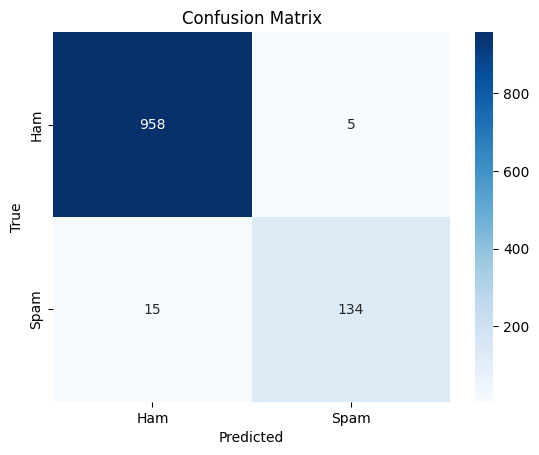

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [17]:
# Function to predict if a message is ham or spam
def predict_message(message):
    message_vec = vectorizer.transform([message])
    prediction = model.predict(message_vec)
    return 'ham' if prediction[0] == 0 else 'spam'

In [18]:
# Test the function with your own input
user_input = input("Enter a message to classify: ")
print("The message is:", predict_message(user_input))

Enter a message to classify: okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm
The message is: spam
